In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [3]:
X = 6 * np.random.rand(200,1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)

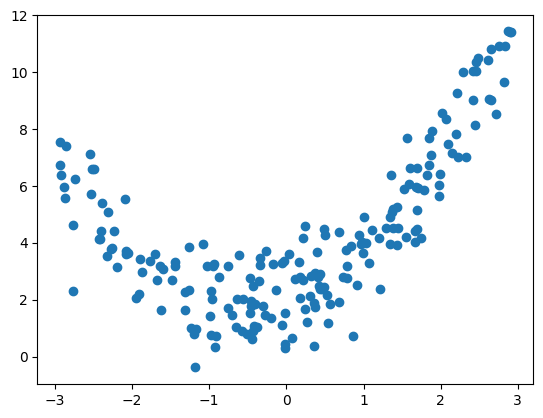

In [4]:
plt.scatter(X, y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.3440196582151983

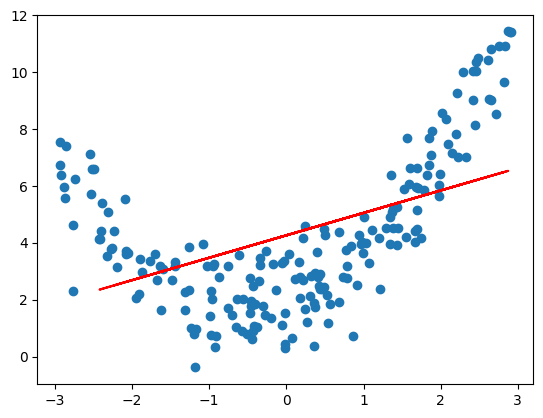

In [7]:
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')

In [8]:
poly = PolynomialFeatures(degree=2)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)


In [9]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)
X_tr= X_test_trans.sort
y_pred = lr.predict(X_test_trans)
r2_score(y_test, y_pred)

0.8496772098990832

In [10]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

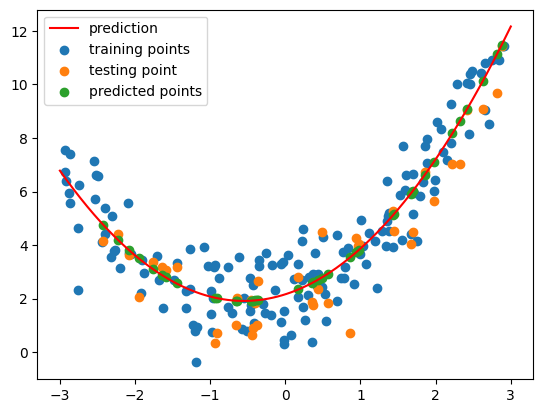

In [13]:
plt.plot(X_new, y_new, label='prediction', color='red')
plt.scatter(X_train, y_train, label='training points')
plt.scatter(X_test, y_test, label='testing point')
plt.scatter(X_test, y_pred, label='predicted points')
plt.legend()
plt.show()


In [27]:
def polynomial_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly _feature", polybig_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg),
    ])
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, 'r', label='degree'+str(degree), linewidth=2)

    plt.plot(X_train, y_train, 'b.')
    plt.plot(X_test, y_test, 'g.')
    plt.legend()
    plt.ylim(0,10)
    plt.show

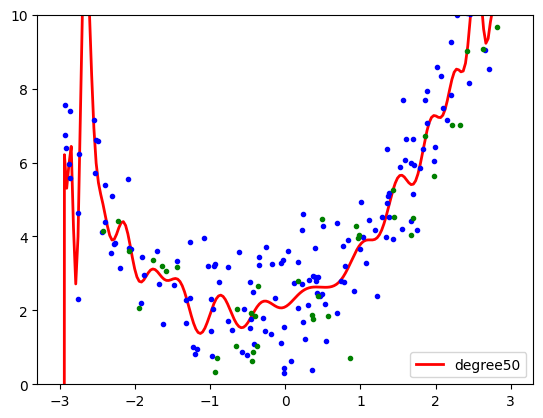

In [29]:
polynomial_regression(50)

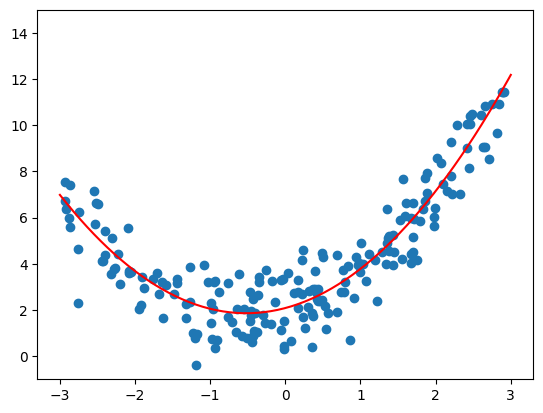

In [47]:
poly = PolynomialFeatures(degree=2)

y = y.ravel()
X_poly = poly.fit_transform(X)
sgd = SGDRegressor(max_iter=100)
sgd.fit(X_poly, y)

X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)

y_new = sgd.predict(X_new_poly)
plt.plot(X_new, y_new, 'r', label='predicted_line')
plt.scatter(X, y, label='training_data')
plt.ylim(-1,15)
plt.show()

In [67]:
# 3D Polynomial regression
x = 7 * np.random.rand(100,1) - 2.8
y = 7 * np.random.rand(100,1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100,1)

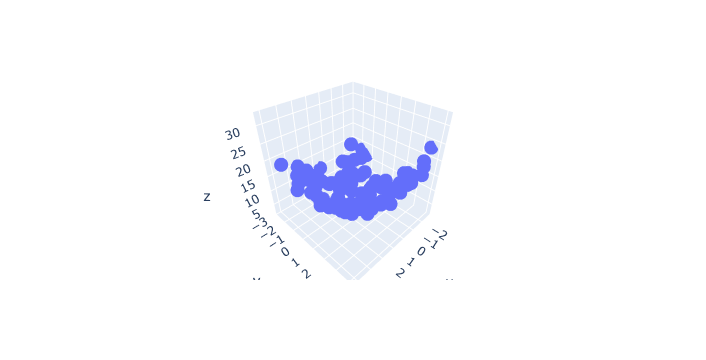

In [68]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [69]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input, y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

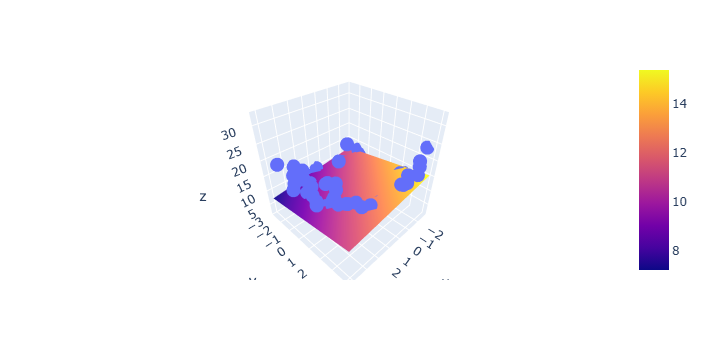

In [70]:
import plotly.graph_objects as go
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final))
fig.show()

In [71]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [72]:
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)

In [73]:
print("Input",poly.n_features_in_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 2
Ouput 6
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [74]:
lr = LinearRegression()
lr.fit(X_multi_trans, z)

LinearRegression()

In [75]:
X_test_multi = poly.transform(final)

In [76]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

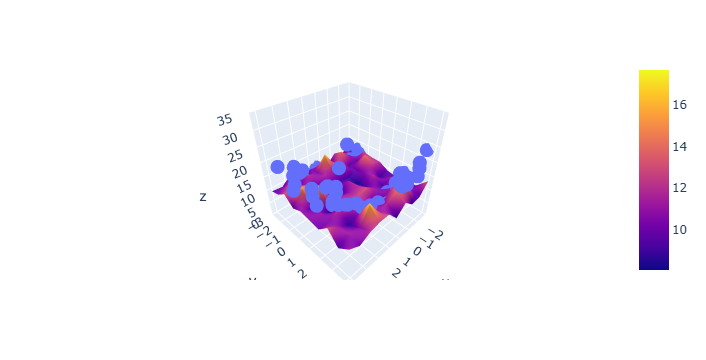

In [77]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()